In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_utils import plot_event_history
sns.set(style="whitegrid")

In [25]:
# evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv").dropna().sort_values(by="event")

pso_log = pd.read_csv("pso_log.csv")

In [ ]:
# Modify the subplots to share the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=pso_log,
    x="num_evals",
    y="current_fitness",
    hue="particle_id",
    ax=ax,
    # palette=sns.color_palette("tab10"),
)
ax.legend().set_visible(False)

ax.set_title("Inertia Weight = 0.7")

# Only show y-axis label on the left plot
ax.set_ylabel("Current Fitness")

ax.set_xlabel("Number of Evaluations")
ax.grid(axis="y")

plt.tight_layout()

## PSO

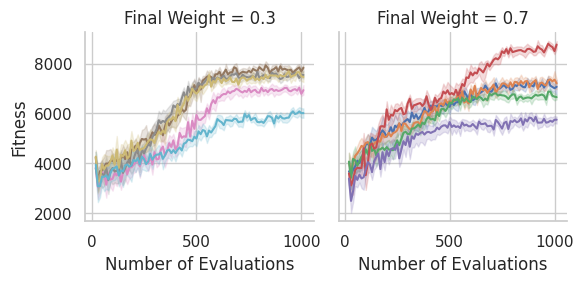

In [27]:
g = sns.FacetGrid(pso_log, col="inertia_weight", hue="run_id")
g.map(sns.lineplot, "num_evals", "current_fitness")
g.set_axis_labels("Number of Evaluations", "Fitness")
g.set_titles(col_template="Final Weight = {col_name}")

### Num Evals Comparison

In [ ]:
# Modify the subplots to share the y-axis
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
sns.lineplot(
    data=pso_log.loc[pso_log.run_id == 0],
    x="num_evals",
    y="current_fitness",
    hue="run_id",
    ax=ax[0],
    # palette=sns.color_palette("tab10"),
)
sns.lineplot(
    data=pso_log.loc[pso_log.run_id == 1],
    x="num_evals",
    y="current_fitness",
    hue="run_id",
    ax=ax[1],
    # palette=sns.color_palette("tab10"),
)
# ax.set_title("PSO Fitness Evolution")
ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)

# Add titles to differentiate the plots
ax[0].set_title("Inertia Weight = 0.7")
ax[1].set_title("Inertia Weight = 2.0")

# Only show y-axis label on the left plot
ax[1].set_ylabel("")
ax[0].set_ylabel("Current Fitness")

ax[0].set_xlabel("Number of Evaluations")
ax[1].set_xlabel("Number of Evaluations")
ax[0].grid(axis="y")
ax[1].grid(axis="y")

plt.tight_layout()

### Inertia Weight Comparison

Text(0, 0.5, 'Velocity Norm')

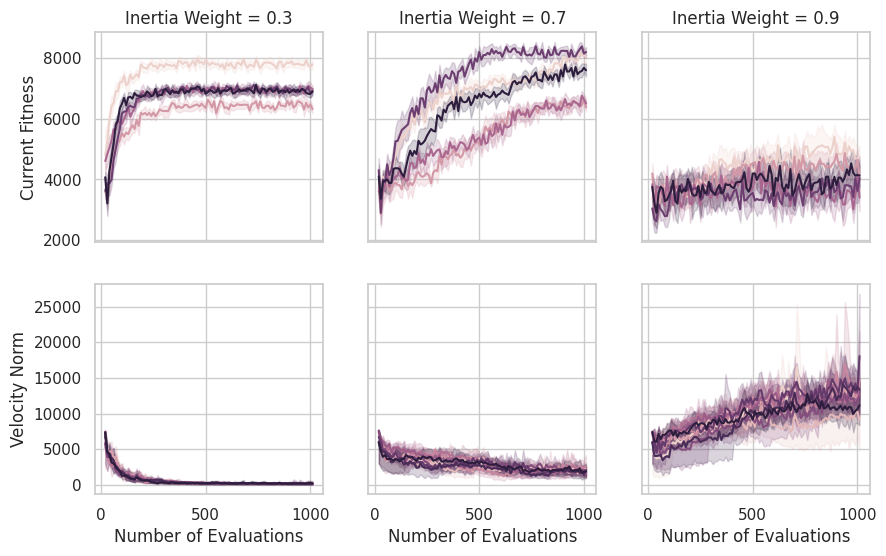

In [43]:
# Modify the subplots to share the y-axis
fig, ax = plt.subplots(2, 3, figsize=(10, 6), sharey="row", sharex="col")
for idx, inertia_weight in enumerate([0.3, 0.7, 0.9]):
    sns.lineplot(
        data=pso_log.loc[pso_log.inertia_weight == inertia_weight],
        x="num_evals",
        y="current_fitness",
        hue="run_id",
        ax=ax[0, idx],
        # palette=sns.color_palette("tab10"),
    )

    sns.lineplot(
        data=pso_log.loc[pso_log.inertia_weight == inertia_weight],
        x="num_evals",
        y="velocity_norm",
        hue="particle_id",
        ax=ax[1, idx],
    )

    ax[0, idx].legend().set_visible(False)
    ax[1, idx].legend().set_visible(False)
    ax[0, idx].set_title("Inertia Weight = {}".format(inertia_weight))
    ax[1, idx].set_xlabel("Number of Evaluations")

ax[0,0].set_ylabel("Current Fitness")
ax[1,0].set_ylabel("Velocity Norm")

In [47]:
price_matrix = pd.read_csv("price_matrix.csv")
price_matrix = price_matrix.loc[price_matrix.t < 10]